# 📈 Linear Regression and Pearson Correlation from Scratch in Python

Welcome to this notebook where I implement **Linear Regression** and **Pearson Correlation Coefficient** from scratch using pure Python — without relying on libraries like `scikit-learn` or `numpy.corrcoef`. This project is designed to deepen my understanding of how statistical relationships work and how simple machine learning models are built under the hood.

---

## 🧠 What You'll Find in This Notebook:

- A manual implementation of the **Pearson Correlation Coefficient** to measure the strength and direction of a linear relationship between two variables.
- A step-by-step **Simple Linear Regression model** built from scratch, including prediction and visualization.
- Testing on sample data to verify correctness.
- Optional visualizations using `matplotlib` and `seaborn` to illustrate the regression line and data points.

---



Let's dive in!

In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plotting

## 🔹 step 1  : Pearson Correlation function
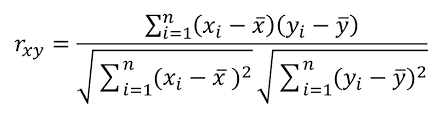

In [2]:
def pearson(x, y):
    # ✅ Convert inputs to NumPy arrays (in case they're not)
    x = np.array(x)
    y = np.array(y)

    # ✅ Check: Inputs must be the same length
    if np.size(x) != np.size(y):
        raise ValueError("Input arrays x and y must be the same length.")

    # ✅ Step 1: Calculate the mean of each variable
    mean_x = np.sum(x) / np.size(x)
    mean_y = np.sum(y) / np.size(y)
    
    # Initialize values for numerator and denominator parts
    numerator = 0
    denominator_x = 0
    denominator_y = 0

    # ✅ Step 2: Loop through each data point
    for i in range(np.size(x)):
        diff_x = x[i] - mean_x      # deviation from mean for x
        diff_y = y[i] - mean_y      # deviation from mean for y
        
        numerator += diff_x * diff_y            # sum of product of deviations
        denominator_x += diff_x ** 2            # sum of squared deviations for x
        denominator_y += diff_y ** 2            # sum of squared deviations for y
        
    # ✅ Step 3: Final calculations
    sqr_denominator_x = np.sqrt(denominator_x)
    sqr_denominator_y = np.sqrt(denominator_y)
    final_denominator = sqr_denominator_x * sqr_denominator_y

    # ✅ Check: Avoid dividing by zero
    if final_denominator == 0:
        raise ValueError("Denominator is zero — likely due to constant values in x or y.")

    # ✅ Step 4: Calculate Pearson correlation coefficient
    r_xy = numerator / final_denominator
    return r_xy
    

## 🔹 step 2 :  load the data with simple analysis & visualization 

In [3]:
data = pd.read_csv("d:\\Study_vs_Score_data.csv")
data.head()

,Attendance_Hours,Final_Marks
0,36.217808,58.997409
1,76.550001,71.598279
2,61.239576,72.520777
3,51.906094,69.005976
4,20.921305,53.259605


**check for the relationship  & visalize**

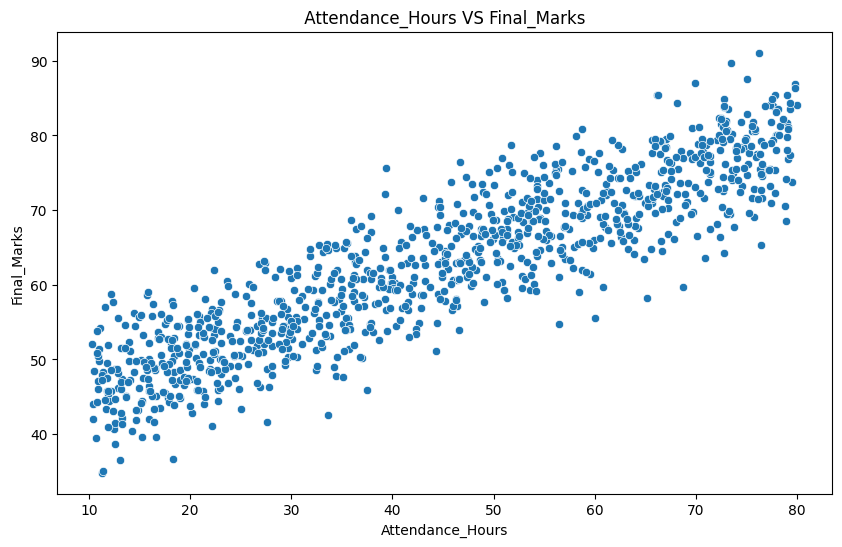

In [4]:
plt.figure(figsize=(10, 6))
g=sns.scatterplot(data=data, x="Attendance_Hours" , y="Final_Marks" )
g.set_title(' Attendance_Hours VS Final_Marks ')
plt.show()

In [5]:
x = np.array(data["Attendance_Hours"])
y = np.array(data["Final_Marks"])

# NumPy Pearson
print("NumPy Pearson r:", np.corrcoef(x, y)[0, 1])

# my custom Pearson
print("Custom Pearson r:", pearson(x, y))

NumPy Pearson r: 0.8965640361807375
Custom Pearson r: 0.8965640361807371


**they have a high positve correlation coef**

## 🔹 Step 3 : Build the Linear Regression Model (From Scratch)

Now that we’ve confirmed a linear relationship between the variables, it’s time to build a simple linear regression model from scratch.

The goal is to find the **best-fit line**:
\[
y = mx + b
\]
Where:
- \( m \) is the **slope**
- \( b \) is the **intercept**

### 1:   create prdiction function
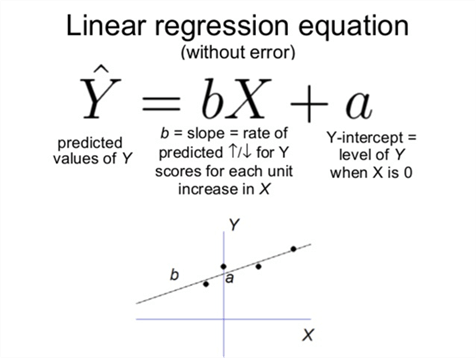

In [6]:
def predict(X, m, b):
    x = np.array(X)
    return (m * x) + b

###  now cost function (mean squared error) 
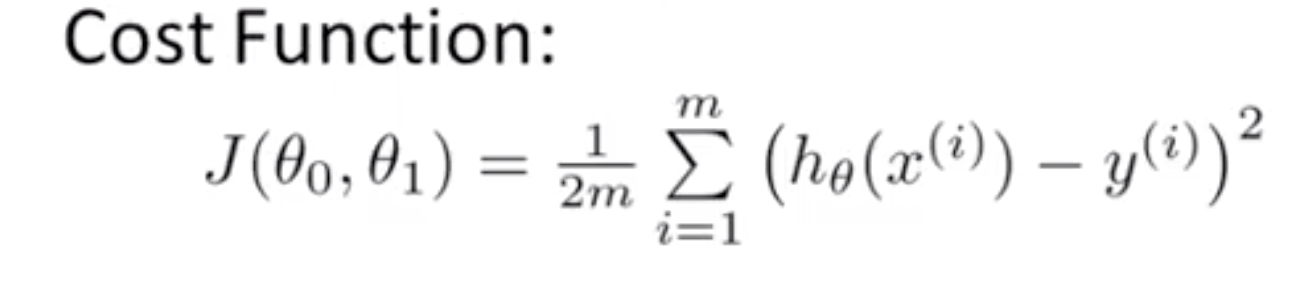 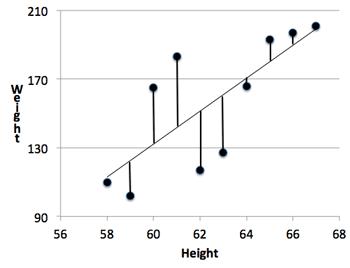

In [7]:
def mse(X, m, b, y):
    y_pred = predict(X, m, b)
    y = np.array(y)
    
    # Squared error
    squared_error = (y - y_pred) ** 2
    
    # Mean of squared errors
    mse = np.sum(squared_error) /(2*np.size(squared_error))
    return mse
  

#### visualization of the cost function 

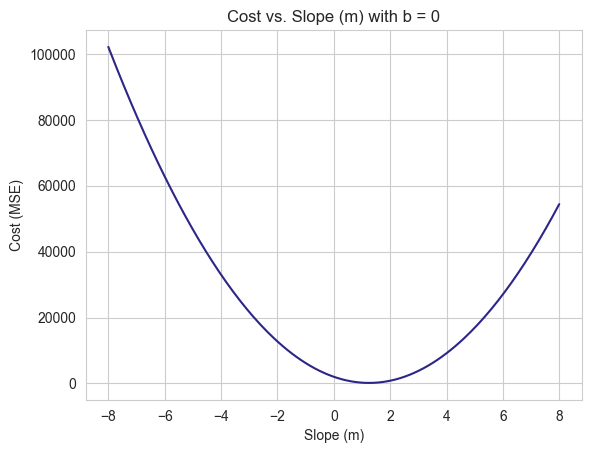

In [8]:
# Fix intercept b, vary slope m
m_values = np.linspace(-8,8 , 200)
cost_values = []

for m in m_values:
    cost = mse(x, m, b=0, y=y)  # fix b = 0 for simplicity
    cost_values.append(cost)


sns.set_style("whitegrid")
sns.set_palette("CMRmap")
ax = sns.lineplot(x=m_values,y=cost_values)
ax.set_title("Cost vs. Slope (m) with b = 0")
ax.set_xlabel("Slope (m)")
ax.set_ylabel("Cost (MSE)")
plt.show()




### 3D Surface Plot of the Cost Function using Matplotlib

This plot visualizes how the Mean Squared Error (MSE) changes with different values of slope (**m**) and intercept (**b**). It helps us understand the "shape" of the cost function and where the minimum cost lies. This surface forms the landscape that gradient descent will navigate.

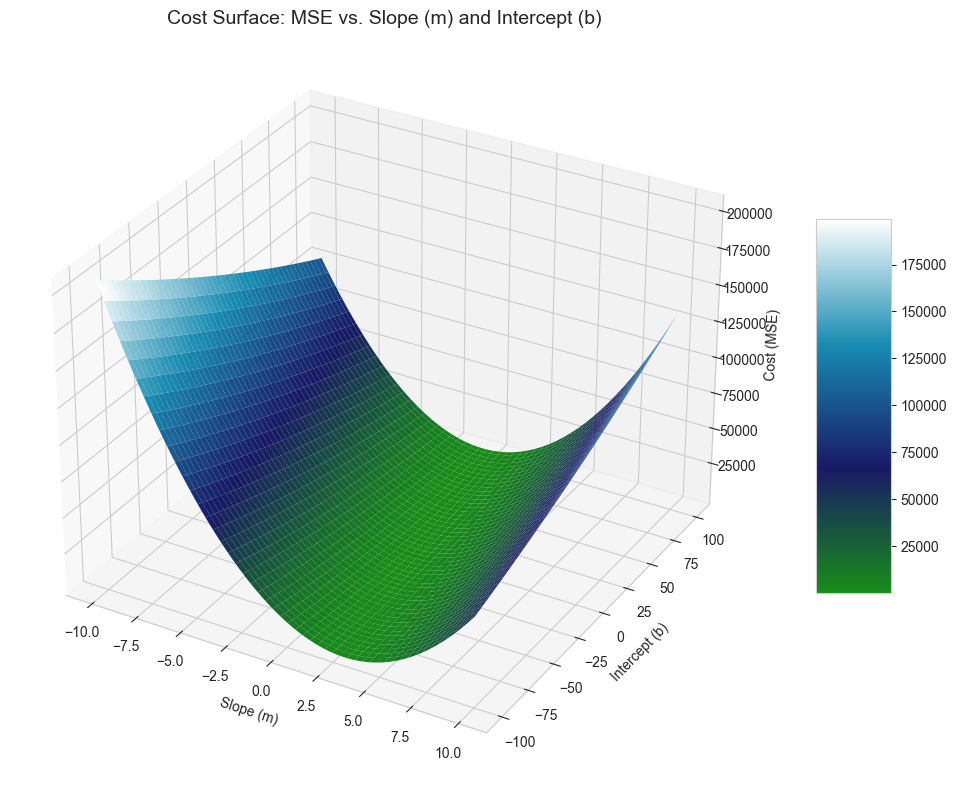

In [9]:
# 3d with vriable b , w 
m_values = np.linspace(-10,10 , 200)
b_values = np.linspace(-100,100 , 200)

#  Create a 2D grid of all (m, b) combinations
M, B = np.meshgrid(m_values, b_values)

# Create a surface Z (same shape as M) to hold the cost values (MSE)
Z = np.zeros_like(M)

for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        Z[i,j] = mse(x,M[i,j],B[i,j],y)




# Plot the 3D cost surface using Matplotlib
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Surface plot: slope (M), intercept (B), and cost (Z)
surface = ax.plot_surface(M, B, Z, cmap='ocean', edgecolor='none', alpha=0.9)

# 6. Label the axes and add a title
ax.set_title("Cost Surface: MSE vs. Slope (m) and Intercept (b)", fontsize=14)
ax.set_xlabel("Slope (m)")
ax.set_ylabel("Intercept (b)")
ax.set_zlabel("Cost (MSE)")

# 7. Add a color bar to show the cost scale
fig.colorbar(surface, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()

### 2D Contour Plot of the Cost Function

This contour plot shows lines of equal cost (MSE) across combinations of slope (**m**) and intercept (**b**). It provides a top-down view of the cost surface, making it easier to visualize the optimization path taken by gradient descent. The goal is to reach the innermost contour where the cost is minimized.

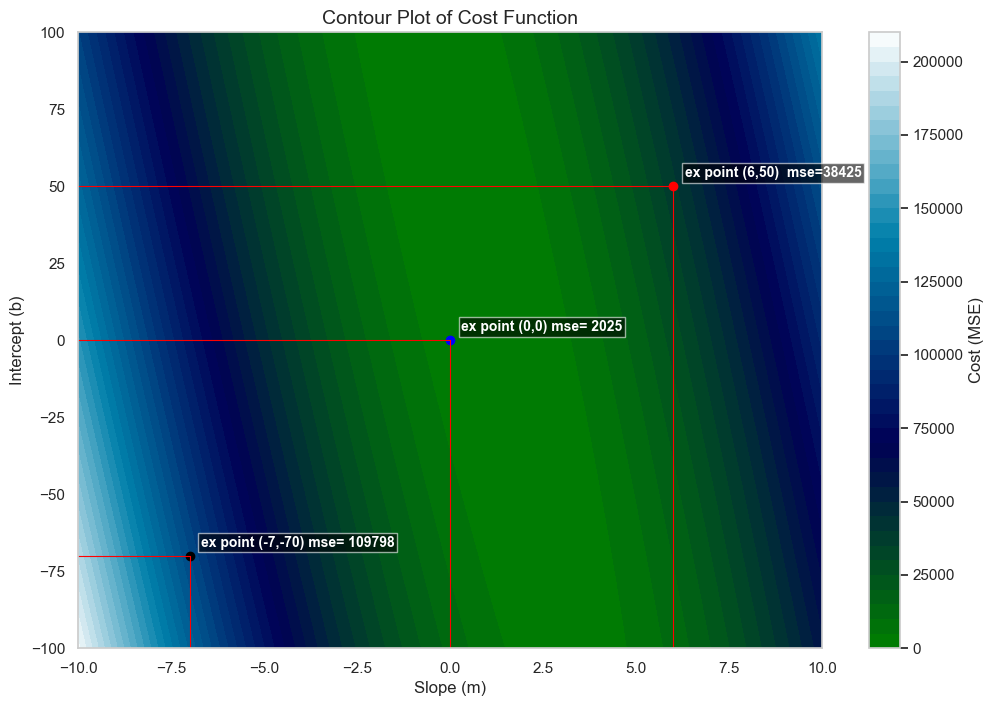

In [10]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Draw contour plot
contour = plt.contourf(M, B, Z, levels=50, cmap="ocean")
plt.colorbar(contour, label='Cost (MSE)')
 
# add example points
# point 1
erorr1=round(mse(x,0,0,y))
 
plt.plot(0, 0, color='blue',marker='o')
plt.plot([-10, 0], [0, 0], 'red', linewidth=0.8)
plt.plot([0, 0], [-100, 0], 'red', linewidth=0.8)
plt.text(0+ 0.3, 0 + 3, 'ex point (0,0) mse= '+str(erorr1) , color='white',
             fontsize=10, weight='bold', bbox=dict(facecolor='black', alpha=0.6, pad=2))


#point 2 
erorr2=round(mse(x,-7,-70,y))
plt.plot(-7, -70, color='black',marker='o')
plt.plot([6, 6], [-100,50], 'red', linewidth=0.8)
plt.plot([-10, -7], [-70, -70], 'red', linewidth=0.8)
plt.text(-7+ 0.3, -70 + 3, 'ex point (-7,-70) mse= '+str(erorr2), color='white',
             fontsize=10, weight='bold', bbox=dict(facecolor='black', alpha=0.6, pad=2))
#point 3 
erorr3=round(mse(x,6,50,y))
plt.plot(6, 50, color='red',marker='o')
plt.plot([-7, -7], [-100,-70], 'red', linewidth=0.8)
plt.plot([-10, 6], [50, 50], 'red', linewidth=0.8)
plt.text(6+ 0.3, 50 + 3, 'ex point (6,50)  mse='+str(erorr3), color='white',
             fontsize=10, weight='bold', bbox=dict(facecolor='black', alpha=0.6, pad=2))
# Label axes
plt.title("Contour Plot of Cost Function", fontsize=14)
plt.xlabel("Slope (m)")
plt.ylabel("Intercept (b)")

plt.grid(True)

plt.show()

### 🧮 Gradient Descent — The Heart of Linear Regression Optimization

Gradient Descent is an iterative optimization algorithm used to minimize the **cost function** (typically Mean Squared Error in regression problems). The goal is to find the best values for the slope (**m**) and intercept (**b**) that reduce the prediction error.

#### 💡 How It Works:
At each step, we:
- Compute the gradient (partial derivatives) of the cost function with respect to `m` and `b`
- Take a step **opposite to the gradient direction**
- Repeat until the updates become very small (convergence)

The step size is controlled by a **learning rate (α)**. A learning rate that's too high may overshoot the minimum; too small will slow convergence.

#### 📉 Update Rules:
 
$$
m = m - \alpha \cdot \frac{\partial \text{MSE}}{\partial m}
\quad , \quad
b = b - \alpha \cdot \frac{\partial \text{MSE}}{\partial b}
$$
Where:  
- $ \alpha $: learning rate  
- $ \frac{\partial \text{MSE}}{\partial m}, \frac{\partial \text{MSE}}{\partial b} $: gradients (slopes of the cost function)

---
**>>note that the update should happen simultaneously**

#### 🔁 Visual Representation of Gradient Descent:

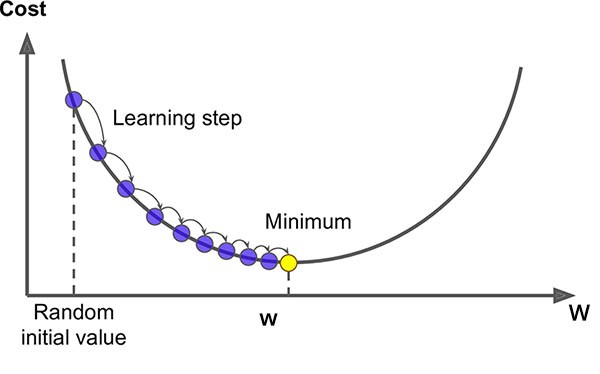


In [11]:
def gradient_descent(x, y, learning_rate, epochs,w=0,b=0):
    
    history = []

    for i in range(epochs):
        y_pred = predict(x, w, b)

        # Compute gradients
        w_grad = np.sum((y_pred - y) * x) / len(y)
        b_grad = np.sum(y_pred - y) / len(y)

        # Update weights
        w -= learning_rate * w_grad
        b -= learning_rate * b_grad

        # Track loss (optional: divide by 2 for classic MSE)
        loss = mse(x, w, b, y)
        history.append((w, b, loss))

    return w, b, history
    

### 📦 Splitting the Data into Training and Testing Sets

To evaluate how well our linear regression model generalizes to unseen data, we need to split our dataset into two parts:

- **Training Set**: Used to train the model and adjust parameters (`m` and `b`)
- **Testing Set**: Used to evaluate how well the trained model performs on data it hasn’t seen before

In this notebook, we’ll implement the split **manually using NumPy**, without relying on external libraries like scikit-learn. We'll randomly shuffle the dataset and use 80% of the data for training and 20% for testing.

In [12]:
np.random.seed(123)# For reproducibility

# Set test size ratio (e.g., 20%)
test_ratio = 0.2
data_size = len(x)

# Shuffle indices
indices = np.arange(data_size)
np.random.shuffle(indices)

# Split indices
test_size = int(data_size * test_ratio)
test_indices = indices[:test_size]
train_indices = indices[test_size:]

# Split the data
x_train, y_train = x[train_indices], y[train_indices]
x_test, y_test = x[test_indices], y[test_indices]

### 🚀 Training with Gradient Descent

Now we'll train our linear regression model using gradient descent.

We'll use:
- `x_train` and `y_train` as the data
- A learning rate to control step size
- A number of epochs (iterations)

The algorithm will update the slope (`w`) and intercept (`b`) to reduce the prediction error. We'l

In [13]:
# Train using gradient descent
learning_rate = 0.00001
epochs = 100000

w_trained, b_trained, history = gradient_descent(x_train, y_train, learning_rate, epochs,w=10,b=50)

print ("our final mse = " ,mse(x,w_trained,b_trained,y), "with w = ",w_trained,"and b= ",b_trained )

our final mse =  16.966913751676344 with w =  0.35125878921870873 and b=  48.36697574238282


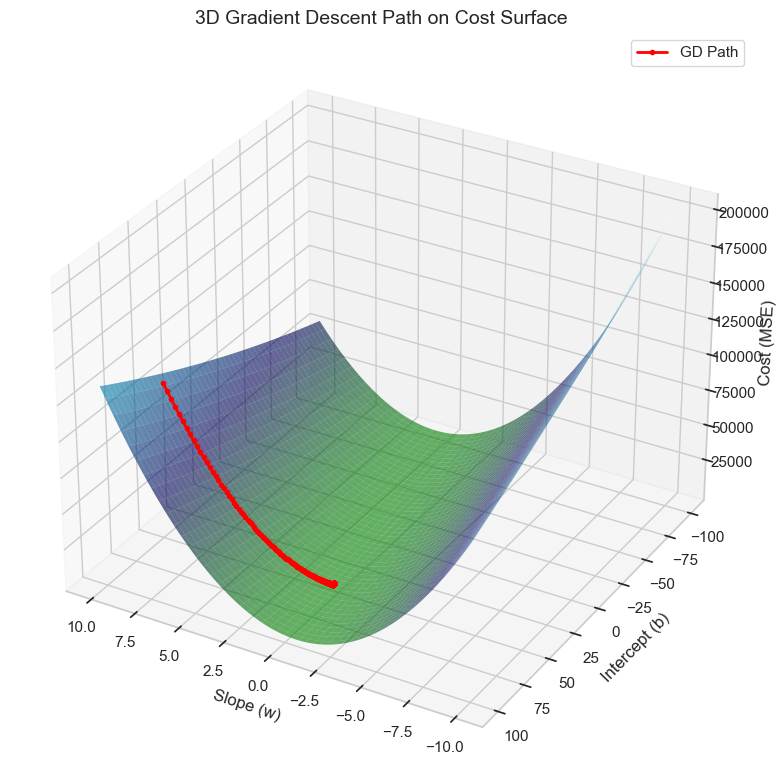

In [14]:
# Unpack history
w_hist = [h[0] for h in history]
b_hist = [h[1] for h in history]
loss_hist = [h[2] for h in history]

# Create 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot cost surface
ax.plot_surface(M, B, Z, cmap='ocean', alpha=0.6, edgecolor='none')

# Plot gradient descent path
ax.plot(w_hist, b_hist, loss_hist, color='red', marker='o', markersize=3, linewidth=2, label='GD Path')

# Labels and view
ax.set_title("3D Gradient Descent Path on Cost Surface", fontsize=14)
ax.set_xlabel("Slope (w)")
ax.set_ylabel("Intercept (b)")
ax.set_zlabel("Cost (MSE)")
ax.view_init(elev=30, azim=120)  # You can adjust view angle here
ax.legend()

plt.tight_layout()
plt.show()

### testing the model 

In [15]:
test_loss = mse(x_test, w_trained, b_trained, y_test)
print(f"Test MSE: {test_loss:.4f}")

Test MSE: 18.5438


### visualize final result 

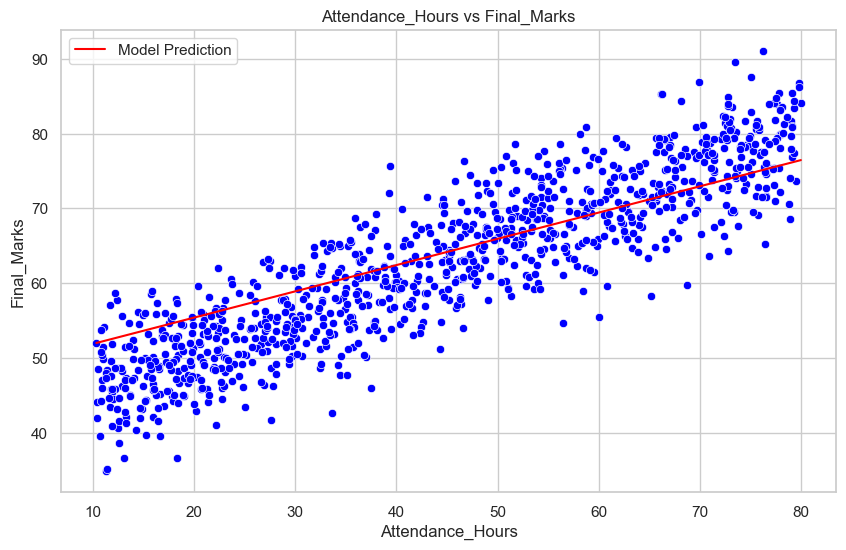

In [16]:
y_pred_test =predict(x_test,w_trained,b_trained)
plt.figure(figsize=(10, 6))


# Scatter plot
g = sns.scatterplot(data=data, x="Attendance_Hours", y="Final_Marks", color='blue')
g.set_title("Attendance_Hours vs Final_Marks")

# Prediction line using final trained model
x_line = np.linspace(min(data["Attendance_Hours"]), max(data["Attendance_Hours"]), 100)
y_line = predict(x_line, w_trained, b_trained)

# Plot the regression line
plt.plot(x_line, y_line, color='red', label='Model Prediction')

plt.legend()
plt.grid(True)
plt.show()


### 👨‍💻 Author

**Mohamed waleed (Elmasry)**  
Aspiring Data Scientist  
[GitHub](https://github.com/Mohamed-Elmasry16) | [LinkedIn](https://www.linkedin.com/in/mohamed-elmasry16)

This notebook was created as part of my personal learning journey to implement Linear Regression and Gradient Descent **from scratch** 

---